# KNN 算法
k紧邻算法，k近邻算法采用测量不同特征值之间的距离方法进行分类(k-Neatest Neighbor)

- 优点
> 精度高，对异常值不敏感，无数据输入假定

- 缺点
> 时间复杂度高，空间复杂度高

**不适用数据范围：数值型和标称型**

1. 用于分类
2. 用于回归

In [29]:
import numpy as py 
import matplotlib.pyplot as plt
import sklearn

In [3]:
# 导入KNN分类器
from sklearn.neighbors import KNeighborsClassifier
# 身高、体重、鞋码
x_train = [[185, 58, 43],[170,70,41],[163,50,36],[165,55,39],[168,48, 37],[156,41,35]]
y_train = ['男', '男', '女','男','女', '女']
# 对应创建的KNN分类器
knn = KNeighborsClassifier(n_neighbors=3)
# 训练数据，自适应数据建立模型
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [4]:
# 随机数据，用于测试
test_cnn = [[181,70,43],[155,50,26]]
# 预测结果
knn.predict(test_cnn)

array(['男', '女'], dtype='<U1')

In [7]:
# 随机异常数据，用于测试
test_cnn_except = [[181,40,30],[155,50,26]]
# 预测结果
knn.predict(test_cnn_except)

array(['女', '女'], dtype='<U1')

## 鸢尾花案例

In [35]:
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
# 抓取训练样本
iris = datasets.load_iris()
x_train_iris = iris.data[::2]
y_train_iris = iris.target[::2]
x_test_iris = iris.data[1::2]
y_test_iris = iris.target[1::2]
knn_iris = KNeighborsClassifier()
knn_iris.fit(x_train_iris, y_train_iris)
ret_ = knn_iris.predict(x_test_iris)
# 计算得分
knn_iris.score(x_test_iris,y_test_iris)


0.9866666666666667

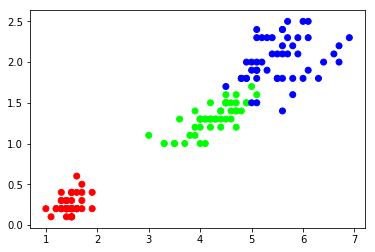

In [37]:
# 内部显示
%matplotlib inline
from matplotlib.colors import ListedColormap
cmap = ListedColormap(["#FF0000","#00FF00","#0000FF"])
# 绘制散点图
plt.scatter(iris.data[:,2],iris.data[:,3],c=iris.target,cmap=cmap)

## KNN分类

Text(0.5,1,'classfy')

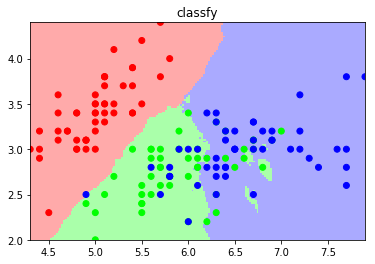

In [46]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets
%matplotlib inline
iris = datasets.load_iris()
x = iris.data[:, :2]
y = iris.target
# 计算周围临近的15个点
K = 15
# 图片的步长
step = 0.02
cmap_light = ListedColormap(["#FFAAAA","#AAFFAA","#AAAAFF"])
cmap_bold = ListedColormap(["#FF0000","#00FF00","#0000FF"])
# 访问最近15个点
my_knn = KNeighborsClassifier(n_neighbors=K)
my_knn.fit(x, y)
xmin, xmax = x[:, 0].min(), x[:, 0].max()
ymin, ymax = x[:, 1].min(), x[:, 1].max()
# 生成网格
xx,yy=np.meshgrid(np.arange(xmin, xmax, step),np.arange(ymin, ymax, step))
# 预测
z = my_knn.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
# 绘图
plt.pcolormesh(xx,yy,z,cmap=cmap_light)
plt.scatter(x[:, 0], x[:,1],c=y,cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("classfy")

## KNN回归

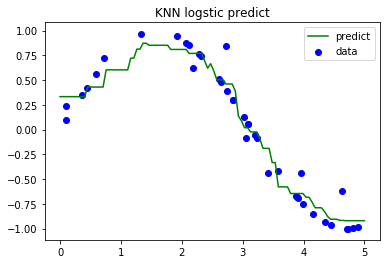

In [61]:
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets
%matplotlib inline
# 设置随机数种子
np.random.seed(0)
x = np.sort(5*np.random.rand(40,1), axis=0)
y = np.sin(x).ravel()
y[::5] += 1*(0.5 - np.random.rand(8))
T = np.linspace(0,5,100)[:, np.newaxis]
logstic_knn = KNeighborsRegressor(n_neighbors=5)
logstic_knn.fit(x,y)
nret = logstic_knn.predict(T)
plt.scatter(x, y, label="data", c='b')
plt.plot(T,nret,label="predict",c="g")
plt.title("KNN logstic predict")
plt.legend()
plt.show()